In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [2]:
np.random.seed(7)

In [3]:
# This loads the CIFAR-10 dataset which is collection of images in 10 classes
# Converts the pixel values of the training and test images to floating point numbers and normalize them between 0 and 1 by dividing with 255.0
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
#Converts the class lables of traing and test set to vectors
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [5]:
#Converts the class lables of traing and test set to vectors
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
#Determine the number of classes in the CIFAR-10 dataset
num_classes = y_test.shape[1]

In [6]:
# Initialize a new sequential model object
model = Sequential()
# Add a 2D Convolutional layer with 32 filters, a 3*3 kernal size and 'same' padding
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
# Add a dropout layer with a rate of 0.2 to reduce overfitting
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
# Add a max pooling layer with the pool size of 2*2 and the 'same' padding
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
# Flatten the output of the convolutional layers into a 1D array
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
# Add a fully connected dense layer with num_classes units and softmax function
model.add(Dense(num_classes, activation='softmax'))

In [7]:
# Creating a new instance of the SGD optimizer with a learning rate of 0.01, momentum of 0.9, and decay of 1e-6 sgd = SGD(learning_rate=0.01, momentum=0.9, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Print the summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                        

In [8]:
epochs = 5
batch_size = 32
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)


Epoch 1/5
1563/1563 [==============================] - 104s 66ms/step - loss: 1.7014 - accuracy: 0.3879 - val_loss: 1.3931 - val_accuracy: 0.4896
Epoch 2/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.3299 - accuracy: 0.5231 - val_loss: 1.2112 - val_accuracy: 0.5695
Epoch 3/5
1563/1563 [==============================] - 141s 90ms/step - loss: 1.1718 - accuracy: 0.5835 - val_loss: 1.0795 - val_accuracy: 0.6186
Epoch 4/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.0513 - accuracy: 0.6255 - val_loss: 1.0857 - val_accuracy: 0.6138
Epoch 5/5
1563/1563 [==============================] - 105s 67ms/step - loss: 0.9467 - accuracy: 0.6651 - val_loss: 1.0126 - val_accuracy: 0.6465


In [9]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 64.65%


In [10]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.optimizers import SGD

# Fix random seed for reproducibility
np.random.seed(7)

# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 5
learning_rate = 0.01
decay_rate = learning_rate / epochs
sgd = SGD(lr=learning_rate, momentum=0.9, decay=decay_rate, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 64)        0         
                                                      

C:\Users\dhara\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


None
Epoch 1/5
1563/1563 [==============================] - 176s 111ms/step - loss: 1.9322 - accuracy: 0.2837 - val_loss: 1.6411 - val_accuracy: 0.4053
Epoch 2/5
1563/1563 [==============================] - 176s 112ms/step - loss: 1.5647 - accuracy: 0.4279 - val_loss: 1.4613 - val_accuracy: 0.4719
Epoch 3/5
1563/1563 [==============================] - 173s 111ms/step - loss: 1.4114 - accuracy: 0.4893 - val_loss: 1.3236 - val_accuracy: 0.5199
Epoch 4/5
1563/1563 [==============================] - 175s 112ms/step - loss: 1.3311 - accuracy: 0.5167 - val_loss: 1.2538 - val_accuracy: 0.5534
Epoch 5/5
1563/1563 [==============================] - 177s 113ms/step - loss: 1.2676 - accuracy: 0.5420 - val_loss: 1.2552 - val_accuracy: 0.5445
Accuracy: 54.45%


In [12]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import numpy as np

In [20]:
# Predict the first 4 images of the test data
predictions = model.predict(X_test[:4])
# Convert the predictions to class labels
predicted_labels = np.argmax(predictions,axis=1)
# Convert the actual labels to class labels
actual_labels = np.argmax(y_test[:4], axis=1)

# Print the predicted and actual labels for the first 4 images
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)

1/1 [==============================] - 0s 39ms/step
Predicted labels: [3 8 8 0]
Actual labels: [3 8 8 0]


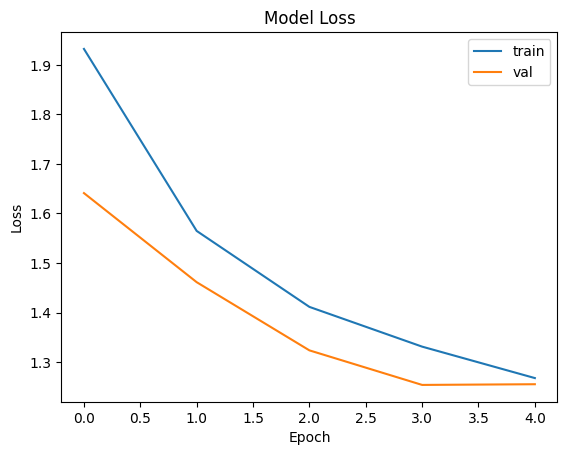

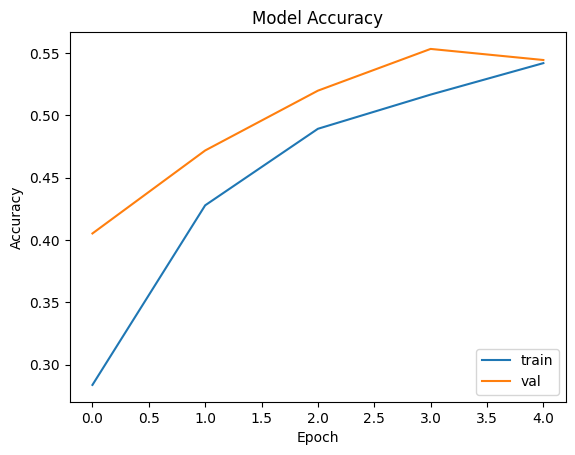

In [21]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()
